## **XGBoost**, **LightGBM**, **CatBoost**, **SMOTE**, **Random Under-Sampling**, **Cost-Sensitive Learning**
## Advanced Classification Techniques & Resampling Methods

# **XGBoost** (Regularizing Gradient Boosting)
- The XGBoost model often achieves higher accuracy than a single decision tree, however, it sacrifices the simple interpretability of decision trees.
- **Features of the XGBoost model**
    - Penalization of trees
    - Proportional shrinking of leaf nodes
    - Automatic feature selection
    - Extra randomization parameter

XGBoost has a regularizing framework. This means XGBoost has regularization built into its algorithm and every time the model decides how to build the next tree it's balancing improving prediction accuracy against complexity. 

**"How much does this improve my predictions?" against "How much complexity am I adding?"**

For XGBoost, regularizing consists of adding penalties to prevent the model from overfitting on the training data and becoming too complex. 

**Regularization puts constraints on how complicated the model can become.**

What could happen to an XGBoost model without regularization?

**Without regularization, an XGBoost model can become overly complex with a deep and intricate tree structure. With a complex structure, the XGBoost model can memorize the training data and perform poorly on unseen test data.**

In [16]:
import xgboost as xgb 
import lightgbm as lgb
# sklearn.model_selection import train_test_split is for splitting data into training and testing sets
# sklearn.model_selection import cross_val_score to test the model on different splits of the data
# from sklearn.model_selection import GridSearchCV is used for tuning hyperparameters
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.metrics import mean_squared_error to measure how far off the prediction was from the actual value 
# from sklearn.metrics import r2_score to measure how well the model explains the variance in the target variable
# from sklearn.metrics import mean_absolute_error to measure the average absolute difference between my prediction and the actual value
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.preprocessing import StandardScaler to scale features
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data set is from baseballsavant. 2025 batting data with standard columns + HR, and minimum 200 PAs. **13 features** **330 observations**

In [57]:
df = pd.read_csv('data/xgboost_tutorial_data.csv')

In [8]:
df

,"last_name, first_name",player_id,year,pa,home_run,k_percent,bb_percent,woba,xwoba,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,"Schanuel, Nolan",694384,2025,535,10,12.3,10.5,0.326,0.332,38.0,4.0,28.5,96.497006,92.292524,15.2,45.3
1,"Pederson, Joc",592626,2025,273,8,21.2,11.4,0.275,0.323,28.5,9.5,45.8,102.273063,95.654051,24.1,43.8
2,"Ohtani, Shohei",660271,2025,683,50,25.3,15.4,0.416,0.436,34.5,22.5,58.3,106.186932,98.294362,33.7,44.6
3,"Saggese, Thomas",695336,2025,253,2,28.1,5.1,0.286,0.283,38.1,6.0,45.2,100.150408,94.771592,26.5,50.4
4,"Arenado, Nolan",571448,2025,402,10,10.0,7.0,0.286,0.295,30.2,3.9,32.6,97.276171,92.663842,16.7,48.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,"Steer, Spencer",668715,2025,524,17,22.3,8.6,0.309,0.293,33.8,7.0,31.7,97.599317,92.847671,24.6,47.9
326,"Díaz, Yandy",650490,2025,618,24,14.6,8.1,0.360,0.364,29.7,8.5,52.4,104.836588,97.122044,17.9,44.5
327,"Herrera, Jose",645444,2025,204,2,23.0,11.3,0.252,0.240,30.8,0.8,22.6,94.051911,91.197591,21.1,38.8
328,"Raley, Luke",670042,2025,203,4,28.6,8.9,0.288,0.318,31.0,10.3,41.4,101.442492,95.066868,40.3,54.1


In [9]:
df.isnull().sum() # clean

last_name, first_name    0
player_id                0
year                     0
pa                       0
home_run                 0
k_percent                0
bb_percent               0
woba                     0
xwoba                    0
sweet_spot_percent       0
barrel_batted_rate       0
hard_hit_percent         0
avg_best_speed           0
avg_hyper_speed          0
whiff_percent            0
swing_percent            0
dtype: int64

In [10]:
y = df['woba']
X = df[[
    'pa',
    'home_run',
    'k_percent',
    'bb_percent',
    'sweet_spot_percent',
    'avg_best_speed',
    'swing_percent'
]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 2002,
    stratify = None
) # train test split
print(f"Number of training set players: {X_train.shape[0]}")
print(f"Number of test set players: {X_test.shape[0]}")


Number of training set players: 264
Number of test set players: 66


In [11]:
# model one
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=2002,
    eval_metric='rmse'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [12]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("Model Performance Metrics")
print(f"Variance explained by the model: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:{mae:.4f}")

Model Performance Metrics
Variance explained by the model: 0.5424
RMSE: 0.0237
MAE:0.0195


In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],      # low, medium, high
    'max_depth': [3, 4, 5, 6],           # 4 options  
    'learning_rate': [0.01, 0.05, 0.1]   # conservative, standard, aggressive
}

In [14]:
# tuning hyper parameters
grid_search = GridSearchCV(
    xgb.XGBRegressor(
        objective='reg:squarederror', 
        random_state=2002
        ),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=1,
        verbose=1
    
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

# **Lecture Notes**

- Boosting models are additive which means they improve on predictions of previous models
- Weak learner means shallow trees (usually one split down)
- In regression, (RMSE, MSE) are considered loss functions
- Log-loss is used in classification problems
- Loss functions are chosen because of how the error effects the overall model
- Squared error loss is sensitive to outliers (if imbalanced data, squared error loss is useful)
- Absolute loss is proportional to the severity of the error
- Log-loss penalizes overconfidence and inaccuracy
    - if my model makes a type 1 error, it penalizes heavily
- Hinge loss is mostly used in SVM models (models that try to maximize margin categories)
    - If my prediction is correct but without a lot of margin then the loss is a higher value
    - The closer I am to the boundary, the closer I am to making a mistake
    - Hinge loss isn't used in a deep learning model (but log-loss is acceptable)
- The gradient tries to make adjustments wrt the prediction to move in the correct direction
- Analyst sets the learning rate (ie: how quickly is the change being applied)
    - Higher learning rate means larger jumps and susceptible to missing local optima
- Use the negative gradient of the loss function given the prediction
- The negative gradient helps the model find the direction of most rapid change
- Delina doesn't recommend going above 0.1 for learning rate
- XGBoost is good with large data sets
- early stopping and learning rate are really the only two parameters that will help control overfitting for an XGBoost model
- Can handle missing data well because it treats missing data as a feature of the data (because it's a property of an additive model)
- gradient boosting is non-parallelizable whereas XGBoost and lightGBM are computationally parallelizable and thus are used in industry
- Pitfalls:
    - Ensemble models tend to have better **precision** than **recall**
    

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline

df = pd.read_csv('data/train.csv')

In [21]:
y = df['Survived'].astype(int) # target 
X = df.drop(columns=['Survived']) # removing target from training data
num_feats = ['age','fare','sibsp','parch', 'pclass'] # numerical features
cat_feats = ['sex', 'embarked','class','who','adult_male','alone'] # categorical features 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
numeric_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler(with_mean=False))
])

categorical_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipe, num_feats),
    ('cat', categorical_pipe, cat_feats)
],
                               remainder='drop'
                               )

In [ ]:
# loading models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 

https://xgboost.readthedocs.io/en/stable/python/python_intro.html#setting-parameters

In [ ]:
models = {
    'LogReg': LogisticRegression(max_iter=2000, n_jobs=None),
    'RandomForest': RandomForestClassifier(n_estimators=500, max_depth=None, min_samples_leaf=2, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(loss='log_loss', learning_rate=0.09, n_estimators=500, subsample=0.8, random_state=42),
    'XGBoost': XGBClassifier(
        n_estimators=800,
        max_depth=3,
        learning_rate=0.09,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        objective='binary:logistic',
        eval_metrics='logloss', # the previous trees loss is the output variable of the next tree, the next tree is trying to minimize the loss
        random_state=42,
        n_jobs=1
    ),
    'LightGBM': LGBMClassifier(
        objective='binary',
        n_estimators=1500,
        learning_rate=0.1,
        num_leaves=63,
        max_bin=5,
        min_child_samples=10,
        min_child_weight=1e-4,
        min_split_gain=0.0, # even with no improvement, keep splitting
        feature_fraction=0.8, # what percentage of columns we're using
        bagging_fraction=0.8,
        force_row_wise=True,
        class_weight=None,
        random_state=42,
        n_jobs=-1
    )
}
# looks like we're letting the models build deep trees and a risk to overfit, but what this actual does it creates flexibility for the models 
# we're building flexibility in the model
# we can control overfitting with early stopping
# make the trees big so there is lots of room of kinda having better performance
# Should care about the number of leaves, the number of children samples because these are the parameters that can lead to overfitting

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'logloss':'neg_log_loss',
    'accuracy':'accuracy',
    'roc_auc':'roc_auc'
}

cv_results = []

for name, clf in models.items():
  pipe = Pipeline([
      ('prep',preprocess),
      ('clf',clf)
  ])

  cv = cross_validate(pipe, X, y, cv=skf, scoring=scoring, n_jobs=-1, return_train_score=False)
  cv_results.append({
      'model':name,
      'logloss_mean': -cv['test_logloss'].mean(),
      'logloss_std':cv['test_logloss'].std(),
      'roc_auc_mean': cv['test_roc_auc'].mean(),
      'accuracy_mean': cv['test_accuracy'].mean()
  })

  cv_table = pd.DataFrame(cv_results).sort_values('logloss_mean')
  cv_table

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'age'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/__init__.py", line 505, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'age'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py", line 906, in fit_transform
    self._validate_column_callables(X)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py", line 496, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/__init__.py", line 513, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


## **Resampling**

In [32]:
# how delina typically evaluates the balance of a data set 
df = pd.read_csv('data/credit_dataset.csv')

In [34]:
df = df.iloc[:,1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              25134 non-null  int64  
 1   GENDER          25134 non-null  object 
 2   CAR             25134 non-null  object 
 3   REALITY         25134 non-null  object 
 4   NO_OF_CHILD     25134 non-null  int64  
 5   INCOME          25134 non-null  float64
 6   INCOME_TYPE     25134 non-null  object 
 7   EDUCATION_TYPE  25134 non-null  object 
 8   FAMILY_TYPE     25134 non-null  object 
 9   HOUSE_TYPE      25134 non-null  object 
 10  FLAG_MOBIL      25134 non-null  int64  
 11  WORK_PHONE      25134 non-null  int64  
 12  PHONE           25134 non-null  int64  
 13  E_MAIL          25134 non-null  int64  
 14  FAMILY SIZE     25134 non-null  float64
 15  BEGIN_MONTH     25134 non-null  int64  
 16  AGE             25134 non-null  int64  
 17  YEARS_EMPLOYED  25134 non-null 

In [ ]:
df['TARGET'].mean()
# first thing to do is explore the underrepresented data and figure out what's happening
# i might not have the right features to really figure out what is happening; no amount of resampling could help
# before i start resampling try to get a sense if this is a solveable problem, do i have enough features/indicators of what a person will do

0.01679000557014403

In [ ]:
minority = df[df['TARGET'] == 1]
minority # do data exploration on this group (minority class)

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
508,5009628,F,N,N,0,238500.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,2.0,59,53,9,1
664,5009938,F,N,Y,2,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,4.0,39,29,6,1
956,5010535,F,Y,N,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,4.0,52,38,8,1
960,5010541,F,Y,N,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,4.0,52,38,8,1
1177,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,1,3.0,51,50,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


In [37]:
majority = df[df['TARGET'] == 0]
majority

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,5150464,F,Y,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,3.0,21,39,1,0
24887,5150465,F,Y,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,3.0,10,39,1,0
24888,5150466,F,Y,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,3.0,1,39,1,0
24889,5150467,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,52,49,7,0


<Axes: xlabel='INCOME', ylabel='Count'>

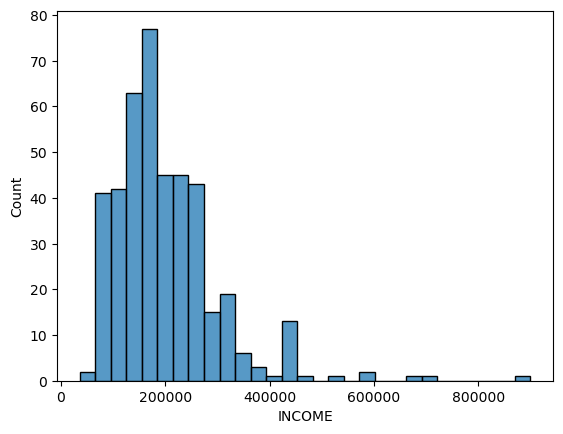

In [38]:
sns.histplot(minority['INCOME'])

<Axes: xlabel='INCOME', ylabel='Count'>

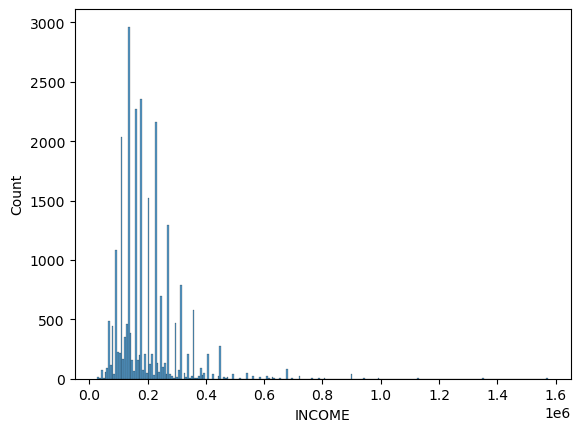

In [ ]:
sns.histplot(majority['INCOME'])
# same type of skew, the majority class does have a little bit of a larger proportion with higher income
# this is probably not a great indicator of whether this credit card transaction is fraudulent transaction or not

In [44]:
minority.groupby('EDUCATION_TYPE')['ID'].count()/len(minority)

EDUCATION_TYPE
Higher education                 0.303318
Incomplete higher                0.049763
Lower secondary                  0.014218
Secondary / secondary special    0.632701
Name: ID, dtype: float64

In [45]:
majority.groupby('EDUCATION_TYPE')['ID'].count()/len(majority)
# maybe 'academic degree' is a differentiator between the majority 

EDUCATION_TYPE
Academic degree                  0.000567
Higher education                 0.283425
Incomplete higher                0.039333
Lower secondary                  0.007324
Secondary / secondary special    0.669351
Name: ID, dtype: float64

In [ ]:
# can start to build an intuition if there is going to be a feature to differentiate between the groups
# if i don't find a difference then i probably don't have features to differentiate
# could just be the behaviour of the data or columns that is not differentiable
# resampling won't help in a meaningful way
# not finding patterns in data exploration that exist in majority or minority class, no amount of resampling is going to help

In [ ]:
# at best no model will be random guessing 
# a tree based model could be helpful (decision tree)
# might use SVM to project to a higher dimensional space to look at features in a different way
# try to improve the feature set by collecting more data

In [47]:
from imblearn.over_sampling import RandomOverSampler # takes the minority class and makes copies of those same observations; might improve recall; just by sheer volume should improve recall
# could also lead to overfitting

In [49]:
from imblearn.under_sampling import RandomUnderSampler # under sampling the majority class, randomly removing observations from majority class
# delina recommends to never really do this because of information loss
# kinda only good for computational efficiency

In [50]:
from imblearn.over_sampling import SMOTE # creates very similar data points like the minority points
# does not make assumptions about the minority class
# similar to over sampling method 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.dropna(inplace=True)

ValueError: Found input variables with inconsistent numbers of samples: [183, 891]

In [55]:
smote = SMOTE(random_state=42, k_neighbors=5)

In [56]:
X_res, y_res = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'Partner, Mr. Austen'